# Mover contenido de un usuario existente a otro nuevo


In [24]:
from arcgis.gis import *

Cree una conexión con el portal.

In [25]:
gis = GIS("https://ags-enterprise4.aeroterra.com/arcgis/", "PythonApi", "test123456", verify_cert=False)

Establecer variables para el usuario actual que se está realizando la transición y para que se cree el nuevo ID de usuario

In [26]:
orig_userid = "afernandez"
new_userid = "pmayo"

Valide que el ID de usuario original es válido y accesible.

In [27]:
olduser = gis.users.get(orig_userid)
olduser

<User username:pmayo>

Crear un nuevo ID de usuario

In [9]:
newuser = gis.users.create(new_userid, "pm123456", "Pablo", "Mayo", \
                           new_userid, description=olduser.description, \
                           role=olduser.role, provider='arcgis', level=2)


<User username:afernandez>
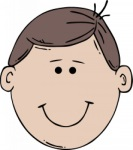

In [28]:
newuser = gis.users.get(new_userid)
newuser

Una vez que se ha creado correctamente el nuevo usuario, reasigne la propiedad del grupo y la pertenencia a grupos del usuario antiguo al nuevo usuario.

In [29]:
usergroups = olduser['groups']

for group in usergroups:
    grp = gis.groups.get(group['id'])
    if (grp.owner == orig_userid):
        grp.reassign_to(new_userid)
    else:
        grp.add_users(new_userid)
        grp.remove_users(orig_userid)

Una vez que se ha cambiado correctamente la propiedad / pertenencia del grupo, reasigne todo el contenido del usuario original al nuevo usuario. Esto ocurre en 2 pases. En primer lugar, reasigne todo en la carpeta raíz de 'Mis contenidos'. A continuación, haga un bucle en cada carpeta, cree la misma carpeta en la nueva cuenta de usuario y reasigne los elementos de cada carpeta al nuevo usuario en la carpeta correcta.


In [30]:
usercontent = olduser.items()
folders = olduser.folders
for item in usercontent:
    try:
        item.reassign_to(new_userid)
    except:
        print(item)

for folder in folders:
    gis.content.create_folder(folder['title'], new_userid)
    folderitems = olduser.items(folder=folder['title'])
    for item in folderitems:
        item.reassign_to(new_userid, target_folder=folder['title'])